In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

from luwiji.text_proc import illustration, demo

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

sw_indo = stopwords.words("indonesian") + list(punctuation)

# import data

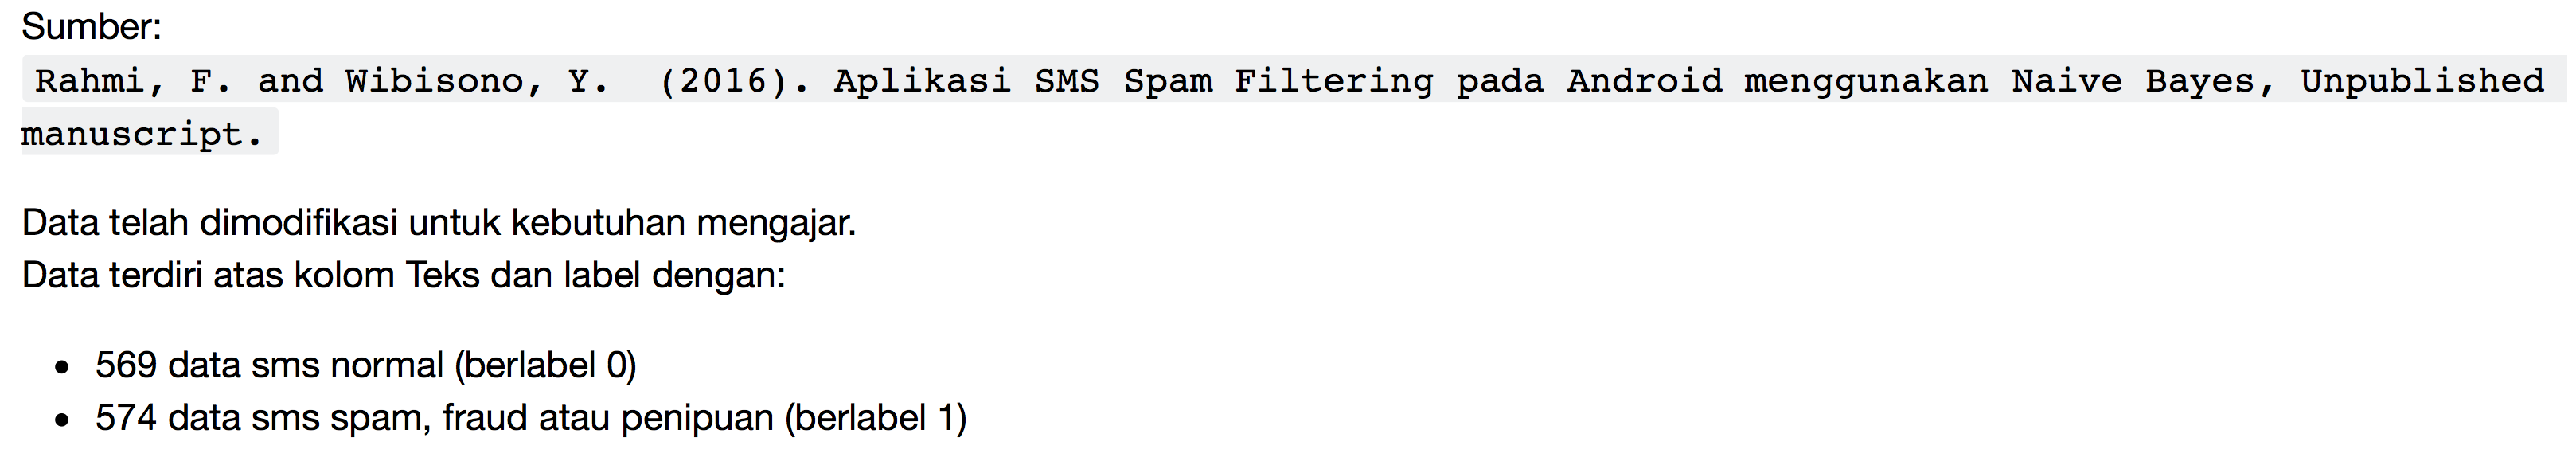

In [5]:
illustration.nomenklatur

In [4]:
df = pd.read_csv("data/spam.csv")
df.head()

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,1
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,1
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",1
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",1
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,1


# Dataset splitting

In [7]:
X = df.Teks
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((914,), (229,), (914,), (229,))

# Training

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from sklearn.linear_model import LogisticRegression

In [10]:

pipeline = Pipeline([
    ('prep', TfidfVectorizer(tokenizer=word_tokenize, stop_words=sw_indo)),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.logreg_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   33.4s finished
/home/yulius/miniconda3/envs/jcopml/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


{'algo__C': 3.907967156822884, 'algo__fit_intercept': True}
0.9978118161925602 0.9638912855910267 0.982532751091703


# Sanity Check

In [12]:
text =["Pelanggan, Kamu Dapat Pesan. Untuk Baca, Hubungi *101*11# Sekarang, Chatting Tanpa Kuota Internet & Raih bonus Pulsa", "PROMO NSP Rp 0/7hr! bls SMS ketik YA utk langganan NSP Teman Cintaku-Devano & Aisyah. Info: tsel.me/nspsk. CS: 188" 
] 
model.predict(text), model.predict_proba(text)

(array([1, 1]), array([[0.08801415, 0.91198585],
        [0.07035804, 0.92964196]]))

In [15]:
text =["saya jemput di jalan sains ya pak, terimakasih"] 
model.predict(text), model.predict_proba(text)

(array([0]), array([[0.92979764, 0.07020236]]))